Demonstrating and comparing different layout features and seeing how they affect bias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Blockage metrics
https://journals.ametsoc.org/view/journals/atot/33/3/jtech-d-14-00199_1.xml

Take an example layout and wind direction and evaluate:
- Blockage ratio
- Blockage distance

In [2]:
from utils import blockage_metrics

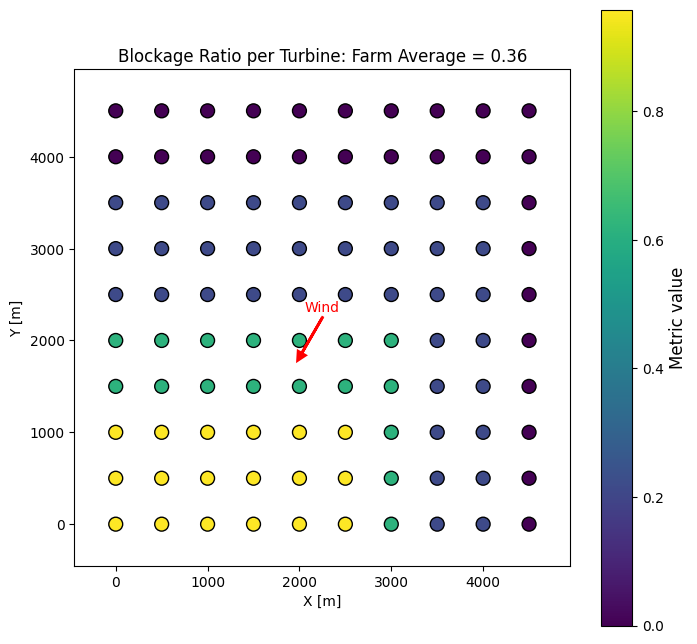

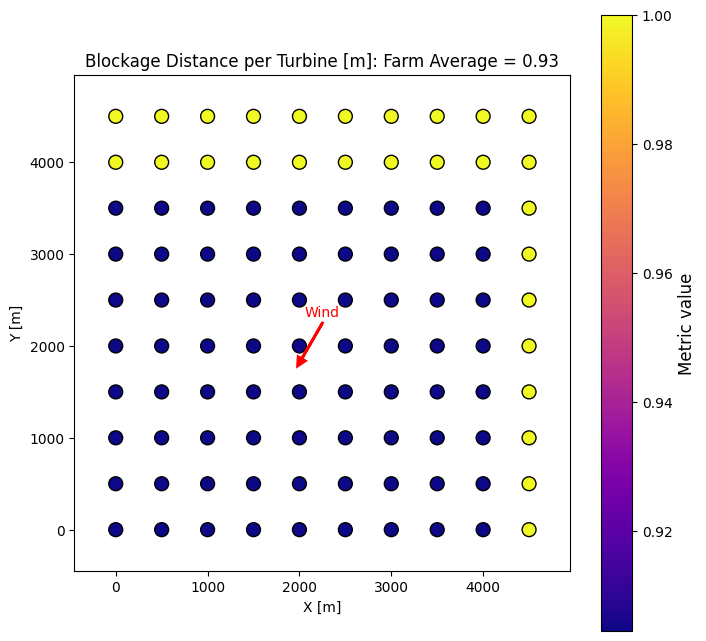

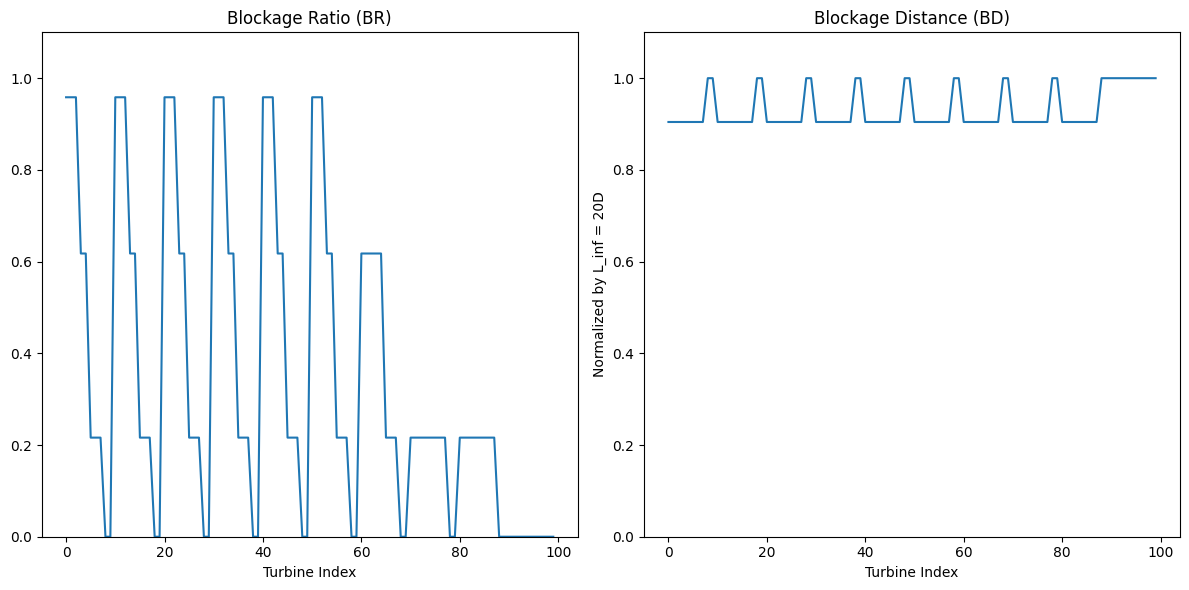

In [ ]:
D = 100  # meters
spacing = 5 * D  # 500 meters
wind_dir=30

x = []
y = []
# setting up an evenly spaced grid for demonstration
for i in range(10):
    for j in range(10):
        x.append(i * spacing)
        y.append(j * spacing)

x = np.array(x)
y = np.array(y)
xy = np.column_stack((x, y))

BR, BD, BR_farm, BD_farm = blockage_metrics(xy, wind_dir, D,plot=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(BR)
ax[0].set_ylim([0,1.1])
ax[0].set_xlabel('Turbine Index')

ax[0].set_title('Blockage Ratio (BR)')

ax[1].plot(BD)
ax[1].set_ylim([0,1.1])
ax[1].set_xlabel('Turbine Index')
ax[1].set_ylabel('Normalized by L_inf = 20D')
ax[1].set_title('Blockage Distance (BD)')

plt.tight_layout()

Farm Length & Width


In [4]:
from utils import farm_length_width

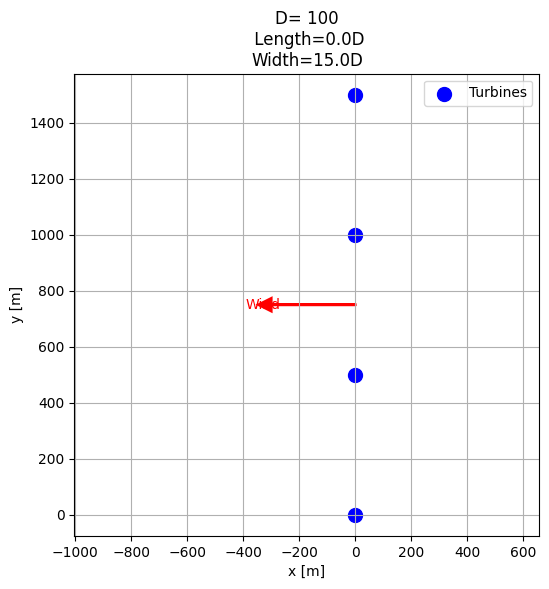

In [5]:
D = 100  # meters
spacing = 5 * D  # 500 meters
direction=90

x = []
y = []
# setting up an evenly spaced grid for demonstration
for i in range(1):
    for j in range(4):
        x.append(i * spacing)
        y.append(j * spacing)

x = np.array(x)
y = np.array(y)
length, width=farm_length_width(x,y,direction,D,plot=True)



# Looking at the effect of each layout feature on the bias (assuming we have already generated the database and added the features in the db_output_analysis notebook)

In [13]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dataset and create version in dataframe format
xr_data=xr.load_dataset("results_stacked_hh.nc")
df=xr_data.to_dataframe().reset_index()
df['log_z0']=np.log(df['z0'].values)
xr_data

<xarray.Dataset> Size: 194kB
Dimensions:                      (sample: 100, case_index: 182)
Coordinates:
  * sample                       (sample) float64 800B 0.0 1.0 2.0 ... 98.0 99.0
    k_b                          (sample) float64 800B 0.03502 ... 0.04703
    ss_alpha                     (sample) float64 800B 0.9133 1.014 ... 1.225
    wind_farm                    (case_index) <U31 23kB 'HR1' ... 'VirtWF_ABL...
    flow_case                    (case_index) float64 1kB 0.0 1.0 ... 14.0 15.0
Dimensions without coordinates: case_index
Data variables: (12/17)
    power_bias_perc              (sample, case_index) float64 146kB 7.945 ......
    wind_speed                   (case_index) float64 1kB 9.947 9.971 ... 12.97
    wind_direction               (case_index) float64 1kB 14.98 9.983 ... 270.0
    turbulence_intensity         (case_index) float64 1kB 0.0538 ... 0.03155
    potential_temperature        (case_index) float64 1kB 293.2 293.2 ... 293.2
    z0                           (case_index) float32 728B 0.00209 ... 0.0002
    ...                           ...
    nt                           (case_index) int64 1kB 80 80 80 ... 100 100 100
    farm_density                 (case_index) float64 1kB 2.452e+05 ... 1.633...
    Blockage_Ratio               (case_index) float64 1kB 0.1439 ... 0.8986
    Blocking_Distance            (case_index) float64 1kB 1.0 1.0 ... 0.326
    Farm_Length                  (case_index) float64 1kB 62.0 58.0 ... 45.0
    Farm_Width                   (case_index) float64 1kB 79.0 76.0 ... 45.0

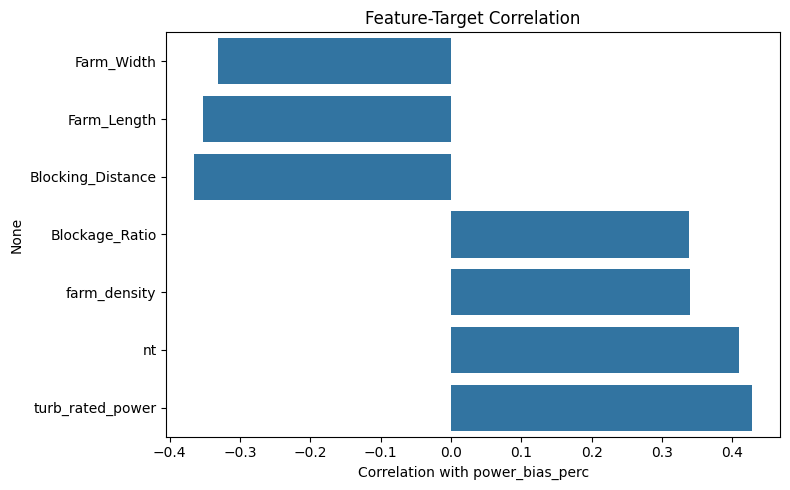

In [ ]:
features = df[['Farm_Width', 'Farm_Length', 'Blocking_Distance', 'Blockage_Ratio', 'farm_density', 'nt', 'turb_rated_power']]
target = df['power_bias_perc']

# Compute correlation between each feature and the target
feature_target_corr = features.corrwith(target)

feature_target_corr.sort_values(ascending=False)


plt.figure(figsize=(8,5))
sns.barplot(x=feature_target_corr.values, y=feature_target_corr.index, orient='h')
plt.xlabel('Correlation with power_bias_perc')
plt.title('Feature-Target Correlation')
plt.tight_layout()
plt.show()